# CC3001 Otoño 2021 Tarea 4 Alumno Tomás Rivas
# Cálculo de derivadas de fórmulas representadas mediante árboles
## Profesores
Sección 1 Iván Sipirán • Sección 2 Patricio Poblete • Sección 3 Nelson Baloian

El objetivo de esta tarea es aprender a procesar la información de árboles que representan fórmulas. Hay muchas cosas que uno puede hacer con estos árboles, y en esta tarea nos enfocaremos en particular en calcular la derivada de una fórmula respecto de una variable dada.

Específicamente, el problema es: dado un árbol que representa una fórmula, construir y retornar otro árbol que representa la derivada de la primera fórmula respecto de una variable dada.

La fórmula se entrega en notación de infijo (normal). En esta fórmula,
los operadores de menor prioridad son la suma (``+``) y la resta (``-``), de igual prioridad entre sí, luego vienen la multiplicación (``*``) y la división (``/``), también de igual prioridad entre sí, y finalmente el operador de mayor prioridad es la elevación a potencia (``^``). También se puede usar paréntesis. Para simplificar no usaremos el operador "menos unario". **Nota importante**: Para no complicar excesivamente las cosas, supondremos que en la elevación a potencia el exponente no contiene la variable respecto de la cual se está derivando.

A continuación usted encontrará las clases ``Nodoi``, ``Nodoe`` y ``Arbol`` que implementan árboles que representan fórmulas. La clase ``Arbol`` viene con un constructor que recibe un string como parámetro, el cual contiene una fórmula, y este constructor se encarga de transformar la fórmula de string a árbol, de modo que usted no necesita preocuparse de eso. Para simplificar, la fórmula solo podrá contener variables de una sola letra, números de un solo dígito, y sin espacios.

Usted tiene que implementar para la clase ``Arbol`` y para los nodos una función ``derivada`` que al ser invocada indicando el nombre de una variable, retorne un árbol que represente la derivada de la fórmula respectiva.

En este enunciado vienen funciones ``derivada`` triviales, que simplemente retornan la misma fórmula, sin derivarla. Usted debe reemplazarlas por la implementación correcta


In [ ]:
!pip install aed-utilities

  Created wheel for aed-utilities: filename=aed_utilities-0.5.2-cp37-none-any.whl size=4467 sha256=713ddd9f2ca535852025d96ece0714756d7253821d692162d161e64ef21303c7
  Stored in directory: /root/.cache/pip/wheels/68/e6/33/33cadc26cc3b96e6f5830bb498d2c521b2e0fca7069fd52473
Successfully built aed-utilities


#Desarrollo del problema

Para lograr el problema fui resolviendo por partes las derivadas partiendo con la derivada de la suma, luego la resta, la multiplicación, la división y finalmente la potencia. Esto es  siguiendo el orden de +, -, *, /, ^. 

##Derivada de la suma (+)

La derivada de la suma fue relativamente sencilla ya que es simplemente la derivada del lado izquierdo sumada a la derivada del lado derecho. En concepto es :

derivada(izq) + derivada(der)

Y traduciéndolo a código tenemos:



```
self.izq.derivada(x)+"+"+self.der.derivada(x)
```

Esto ya que queremos llegar a la derivada de la forma que si por ejemplo si tenemos la función “x+5+x+1”, la derivada sea un string “1+0+1+0”(Ya que así después poniendo el string dentro de Árbol() tenemos el árbol de la derivada). Y por lo tanto necesitamos poner el símbolo “+” entre comillas como la operación que realizamos y usamos los + para unir los string. Este será el método usual de escribir las derivadas para todas las operaciones.

Sin embargo, esto no está listo ya que este código es para los nodos con hijos (Nodoi) y hay que realizar la sección para los nodos externos (Nodoe). Esto es bien sencillo ya que tenemos solo 2 casos, si el nodo externo es la variable respecto a la cual estamos derivando retornamos “1” (En forma de string para poder sumarlo a los otros string) y si no es la variable simplemente retornamos “0” ya que la derivada de una constante es 0. Estos casos base nos servirán para todas las operaciones. Esto en código se ve así:



```
def derivada(self,x):
        if self.info==x:
          return "1"
        else:
          return "0"
```

Y finalmente solo nos falta comprobar si la operación es actual es una suma (En un Nodoi) y esto lo hacemos con:



```
if self.info=="+"
```

Sumando todas las partes tenemos:



```
Nodoi:

def derivada(self,x):
        if self.info=="+":
          return self.izq.derivada(x)+"+"+self.der.derivada(x)

Nodoe:

def derivada(self,x):
        if self.info==x:
          return "1"
        else:
          return "0"
```

Y finalmente realice unas pruebas solo con sumas para ver que funcionara correctamente.



##Derivada de la resta (-)


Diría que esta fue la mas sencilla ya que solo tuve que a la de la suma remplazar los + por –  y quedo listo. En código nos quedaría así:

```
Nodoi:

def derivada(self,x):
        if self.info=="+":
          return self.izq.derivada(x)+"+"+self.der.derivada(x)
        if self.info=="-":
          return self.izq.derivada(x)+"-"+self.der.derivada(x)
Nodoe:

def derivada(self,x):
        if self.info==x:
          return "1"
        else:
          return "0"
```

Y nuevamente realice unas pruebas solo con sumas para ver que funcionara correctamente.




##Derivada de la multiplicación(*)

Esta es yo diría la que presento la mayor cantidad de complicaciones ya que si bien uno podría pensar que basta con replicar la metodología de la suma y la resta es un poco mas complejo que eso. Conceptualmente sabemos que tenemos que lograr que sea:

derivada(izq)*der + derivada(der) * izq

Pero aquí surge el primer problema que es retornar la parte derecha e izquierda como strings en vez de Nodoi. Para esto modificaremos las clases talque sean capaces de hacer esta transición.

Esta transición la llamaremos inorden ya que es muy similar a la manera en que funciona la devolución por inorden, vamos poniendo izquierda;operación(o centro);derecha y por lo tanto tendrá una estructura similar. En el árbol tenemos:



```
def inorden(self): 
      return self.raiz.inorden()
```
Luego en los Nodoi tenemos que tener el inorden del hijo izquierdo más la info del nodo actual más el inorden del hijo derecho por lo que queda:



```
def inorden(self):
        return self.izq.inorden()+self.info+self.der.inorden()  
```
Y finalmente para los Nodoe necesitamos que devuelvan su info por lo que tenemos:



```
def inorden(self):
        return (self.info)
```





Con este problema resuelto nos ponemos a escribir la multiplicación, pero hay que poner paréntesis adecuados ya que cuando lo probamos sin estos, se desordenan las derivadas debido a que no multiplica correctamente. Considerando esto y poniendo el inorden cuando tengamos que retornar el nodo izquierdo o derecho en forma de string tenemos:



```
if self.info=="*":
          return "(" + self.izq.derivada(x) + ")" + "*" + self.der.inorden() + "+" + "(" + self.der.derivada(x) + ")"   + "*" + self.izq.inorden()
```

Y ahora continuamos con la división

##Derivada de la división(/)

Aquí es sencillo ya que tenemos definido inorden de la parte anterior por lo que simplemente escribimos la formula de la derivada de la división correctamente y cuidando los paréntesis para que siga el orden correcto. El código total nos quedaría:



```
Arbol:

def inorden(self): 
      return self.raiz.inorden()

Nodoi:

def inorden(self):
        return self.izq.inorden()+self.info+self.der.inorden()

def derivada(self,x):
        if self.info=="+":
          return self.izq.derivada(x)+"+"+self.der.derivada(x)
        if self.info=="-":
          return self.izq.derivada(x)+"-"+self.der.derivada(x)
        if self.info=="*":
          return "(" + self.izq.derivada(x) + ")" + "*" + self.der.inorden() + "+" + "(" + self.der.derivada(x) + ")"   + "*" + self.izq.inorden()
        if self.info=="/":
          return "(" + "(" + self.izq.derivada(x) + ")" + "*" + self.der.inorden() + "-" + "(" + self.der.derivada(x) + ")"   + "*" + self.izq.inorden() + ")" + "/" + "("+ self.der.inorden()+ ")" + "^" + "2"
Nodoe:

def inorden(self):
        return (self.info)

def derivada(self,x):
        if self.info==x:
          return "1"
        else:
          return "0"
```



##Derivada de la potencia(^)

Finalmente, para esta derivada usamos su fórmula, y como concepto se ve así:

der*(izq)^(der-1)*derivada(izq)

Traducido a código y con los paréntesis correspondientes nos queda:



```
if self.info=="^":
          return "(" + self.der.inorden() + ")" + "*" + "(" + self.izq.inorden() + ")" + "^" "("+self.der.inorden() + "-" + "1" + ")" + "*" + "(" + self.izq.derivada(x) + ")"    

```



Y ahora solo nos queda juntar todo esto en el código final.

##Código final

In [ ]:


import aed_utilities as aed

class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
    def postorden(self):
        self.izq.postorden()   
        self.der.postorden()
        print(self.info, end=" ")
    def inorden(self):#El inorden como lo vimos en la descripción, sumando todas las partes
        return self.izq.inorden()+self.info+self.der.inorden()        
    def derivada(self,x):
        if self.info=="+":#Condiciones y formula derivada de la suma
          return self.izq.derivada(x)+"+"+self.der.derivada(x)
        if self.info=="-":#Condiciones y formula derivada de la resta
          return self.izq.derivada(x)+"-"+self.der.derivada(x)
        if self.info=="*":#Condiciones y formula derivada de la multiplicación
          return "(" + self.izq.derivada(x) + ")" + "*" + self.der.inorden() + "+" + "(" + self.der.derivada(x) + ")"   + "*" + self.izq.inorden()
        if self.info=="/":#Condiciones y formula derivada de la división
          return "(" + "(" + self.izq.derivada(x) + ")" + "*" + self.der.inorden() + "-" + "(" + self.der.derivada(x) + ")"   + "*" + self.izq.inorden() + ")" + "/" + "("+ self.der.inorden()+ ")" + "^" + "2"
        if self.info=="^":#Condiciones y formula derivada de la potencia
          return "(" + self.der.inorden() + ")" + "*" + "(" + self.izq.inorden() + ")" + "^" "("+self.der.inorden() + "-" + "1" + ")" + "*" + "(" + self.izq.derivada(x) + ")"    

class Nodoe:
    def __init__(self, info):
        self.info=info
    def postorden(self):
        print(self.info, end=" ")
    def inorden(self): 
        return (self.info) #Que el inorden nos retorne la info del Nodoe
    def derivada(self,x): #La definición de los casos base
        if self.info==x:#Si es igual a la variable a la que derivamos retornamos “1”
          return "1"
        else:#En caso contrario retornamos “0”
          return "0"

class Arbol:
    def __init__(self,formula):
        if type(formula)!=str: # se supone que viene el árbol ya construído
          self.raiz=formula
          return

        # la fórmula viene en forma de string
        global k
        global s
        s=formula+";" # agregamos una marca de fin de la entrada
        k=0 # indica próximo caracter por procesar
        # definimos funciones para analizar la fórmula
        def expresion(): # retorna puntero a la raíz de un árbol que representa a la fórmula s
            global k
            global s
            a=factor()
            while s[k]=="+" or s[k]=="-":
                op=s[k]
                k+=1
                b=factor()
                a=Nodoi(a,op,b)
            return a
        def factor():
            global k
            global s
            a=termino()
            while s[k]=="*" or s[k]=="/":
                op=s[k]
                k+=1
                b=termino()
                a=Nodoi(a,op,b)
            return a
        def termino():
            global k
            global s
            a=primario()
            if s[k]=="^":
                op=s[k]
                k+=1
                b=termino()
                a=Nodoi(a,op,b)
            return a
        def primario(): # posible constante, variable o formula parentizada
            global k
            global s
            if s[k].isalpha() or s[k].isdigit():
                a=Nodoe(s[k])
                k+=1
                return a
            if s[k]=="(": # fórmula parentizada
                k+=1
                a=expresion()
                if s[k]!=")":
                    print("Error: Falta cierra paréntesis: "+formula[k:])
                    assert False
                k+=1
                return a
            print("Error: Falta variable, número o abre paréntesis: "+formula[k:])
            assert False
              
        a=expresion()
        if s[k]!=";":
            print("Error: Basura al final de la fórmula: "+formula[k:])
            assert False                
        self.raiz=a
    
    def derivada(self,x):
        return Arbol(self.raiz.derivada(x))

    def inorden(self): #El inorden para devolver el string
        return self.raiz.inorden()

    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der",classNone=Nodoe )
      btd.draw_tree(self, "raiz")


A continuación probamos esta funcionalidad con varias fórmulas de ejemplo. Para ver si el árbol fue construido correctamente, lo dibujaremos, y también dibujaremos el árbol resultante después del cálculo de la derivada.

###Pruebas

In [ ]:
def probar_derivada(formula,x):
    f=Arbol(formula)
    print("Fórmula original:")
    f.dibujar()
    g=f.derivada(x)
    print("Derivada respecto de "+x+":")
    g.dibujar()

Fórmula original:


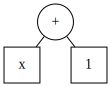

Derivada respecto de x:


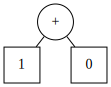

In [ ]:
probar_derivada("x+1","x")

Fórmula original:


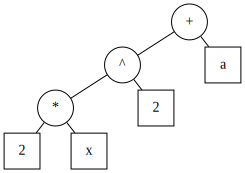

Derivada respecto de x:


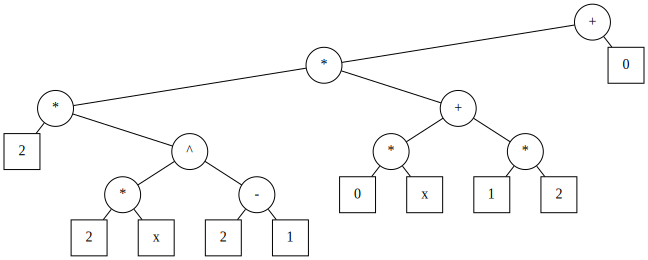

In [ ]:
probar_derivada("(2*x)^2+a","x")

Fórmula original:


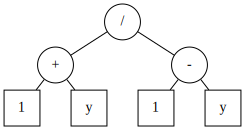

Derivada respecto de y:


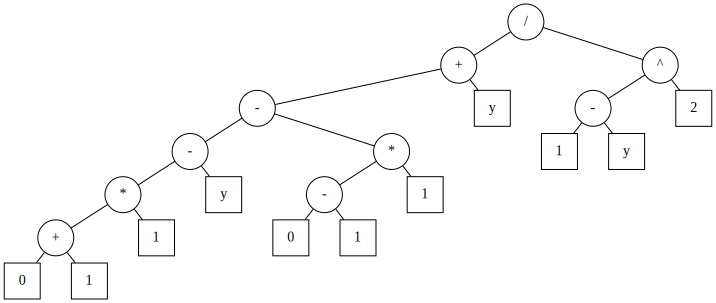

In [ ]:
probar_derivada("(1+y)/(1-y)","y")

Fórmula original:


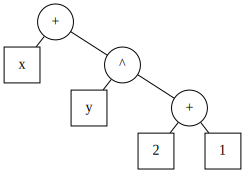

Derivada respecto de x:


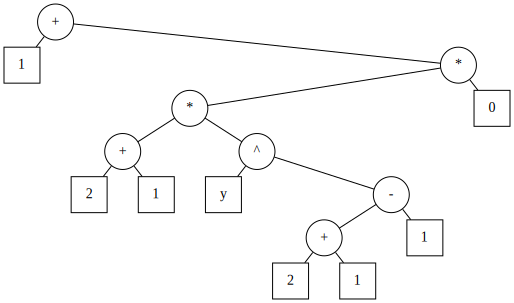

In [ ]:
probar_derivada("x+y^(2+1)","x")

Fórmula original:


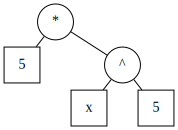

Derivada respecto de x:


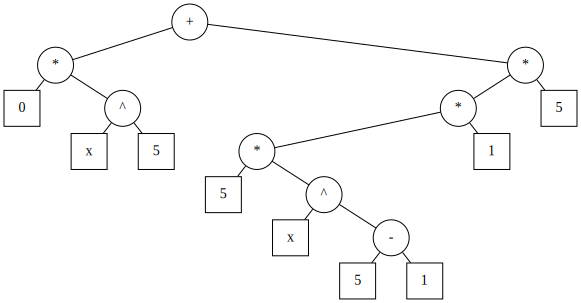

In [ ]:
probar_derivada("5*x^5","x")

Fórmula original:


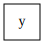

Derivada respecto de y:


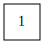

In [ ]:
probar_derivada("y","y")

Fórmula original:


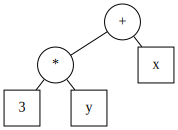

Derivada respecto de y:


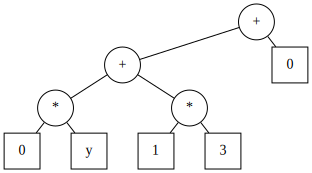

In [ ]:
probar_derivada("3*y+x","y")

Fórmula original:


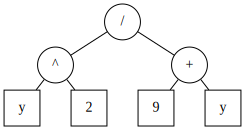

Derivada respecto de y:


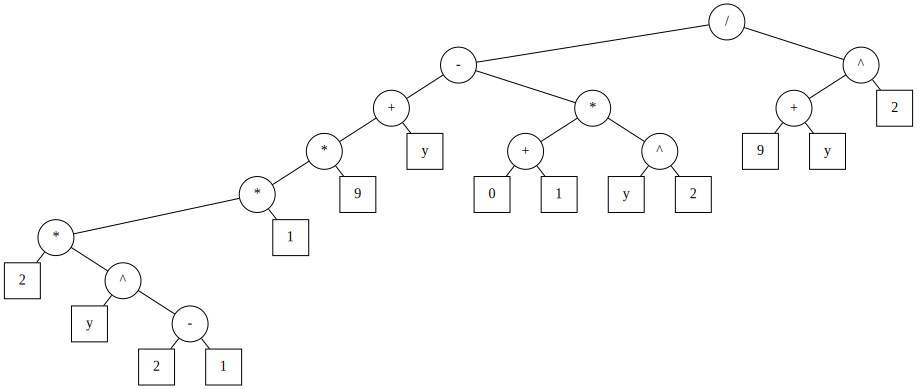

In [ ]:
probar_derivada("y^2/(9+y)","y")

## Simplificaciones

Como habrá visto, las fórmulas resultantes no son muy sencillas, pero también es obvio que se se podrían simplificar para que quedaran mucho más presentables. A continuación, proponga y describa cómo podrían implementarse algunas simplificaciones. Piense recursivamente. No es necesario que las implemente, pero si se atreve, agregue un método ``simplificar`` y pruébelo dibujando el árbol resultante.


Para simplificar yo me pondría a buscar aquellos casos cuyos resultados son triviales y generan operaciones innecesarias como sumar o restar 0. Casos de ejemplo:



1.   Sumar y restar 0:



> Simplemente podemos omitir la operación y cortar la parte de la suma/resta y unir la rama que queda con el elemento que no es 0 de la operación.


2.  Multiplicar por 1:



> Igual que en el caso anterior cortamos esta operación y unimos el hijo que no era 1.

3. Multiplicar por 0



>En este caso podríamos sacar la operación completa y dejar simplemente un 0 ya que cualquier cosa por 0 es 0.


Si bien existen mas maneras de simplificar, si recorremos el árbol buscando estos casos y arreglándolos muchos de los árboles de derivadas disminuirían significantemente en tamaño.










## ¿Qué hay que entregar?

Usted debe entregar este mismo archivo, modificado de acuerdo a lo que se pide. Haga todos los cambios necesarios para explicar y documentar adecuadamente su código. No olvide poner su nombre.